In [1]:
library('igraph')
library('Matrix')
library('pracma')
library('data.table')



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

Warning message:
“package ‘pracma’ was built under R version 3.5.0”
Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



In [2]:
#  install.packages('resample_0.4.tgz', repos = NULL, type ='/Users/nnguyen/Desktop/resample_0.4.tgz')

# download.packages('resample',destdir='/Users/nnguyen/Desktop/resample_0.4.tgz')


In [3]:
# 1. Generating Random Networks
        # 1. Create random networks using Erdos-Renyi (ER) model
        # (a) Create an undirected random networks with n = 1000 nodes, and the probability p
        # for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1.
        # Plot the degree distributions. What distribution is observed? Explain why. Also,
        # report the mean and variance of the degree distributions and compare them to the
        # theoretical values.
        # (b) For each p and n = 1000, answer the following questions:
        # Are all random realizations of the ER network connected? Numerically estimate the
        # probability that a generated network is connected. For one instance of the networks
        # with that p, find the giant connected component (GCC) if not connected. What is
        # the diameter of the GCC?
        # (c) It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of
        # the total network size) is a highly nonlinear function of p, with interesting properties
        # occurring for values where p = O( ln n
        # n ). For n = 1000, sweep over values of p in this
        # region and create 100 random networks for each p. Then scatter plot the normalized
        # GCC sizes vs p. Empirically estimate the value of p where a giant connected component
        # starts to emerge (define your criterion of \emergence")? Do they match with
        # theoretical values mentioned or derived in lectures?

In [4]:
# Problem 2

In [5]:
# Random walk on Erdos-Renyi networks

In [6]:
# helper methods
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
  if(is.null(transition_matrix))
    transition_matrix = create_transition_matrix(g)
  
  v = start_node
  for(i in 1:num_steps){
    #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
    PMF = transition_matrix[v, ]
    v = sample(1:vcount(g), 1, prob = PMF)        
  }
  
  return(v)
}

# plotgraph_with_lastnodes = function (g, steps = 100, times = 1000){
#   g.components <- clusters(g)
#   ix <- which.max(g.components$csize)
#   g.giant <- induced.subgraph(g, which(g.components$membership == ix))
#   tm = create_transition_matrix(g.giant)
#   set.seed(1)
#   nodes = matrix(NA, nrow=times, ncol=steps)
#   last_nodes = array(1:times)
#   for(i in 1:times){
#     start = sample(1:vcount(g.giant), 1)
#     row_nodes = random_walk(g.giant, steps, start, tm)
#     last_nodes[i] = row_nodes[steps]
#     nodes[i, ] = shortest.paths(g.giant, row_nodes, start)
#   }
#   means = colMeans(nodes)
#   vars = colVars(nodes)
#   plot(means, main = "<s(t)> v.s. t", xlab = "t", ylab = "<s(t)>")
#   plot(vars, main = "standard deviation v.s. t", xlab = "t", ylab = "sigma(t)^2")
#   return(last_nodes)
# }



In [7]:
# (a) Create an undirected random network with 1000 nodes, and the probability p for
# drawing an edge between any pair of nodes equal to 0.01.


[1] "Problem 2.1a"
[1] "Problem 2.1b"


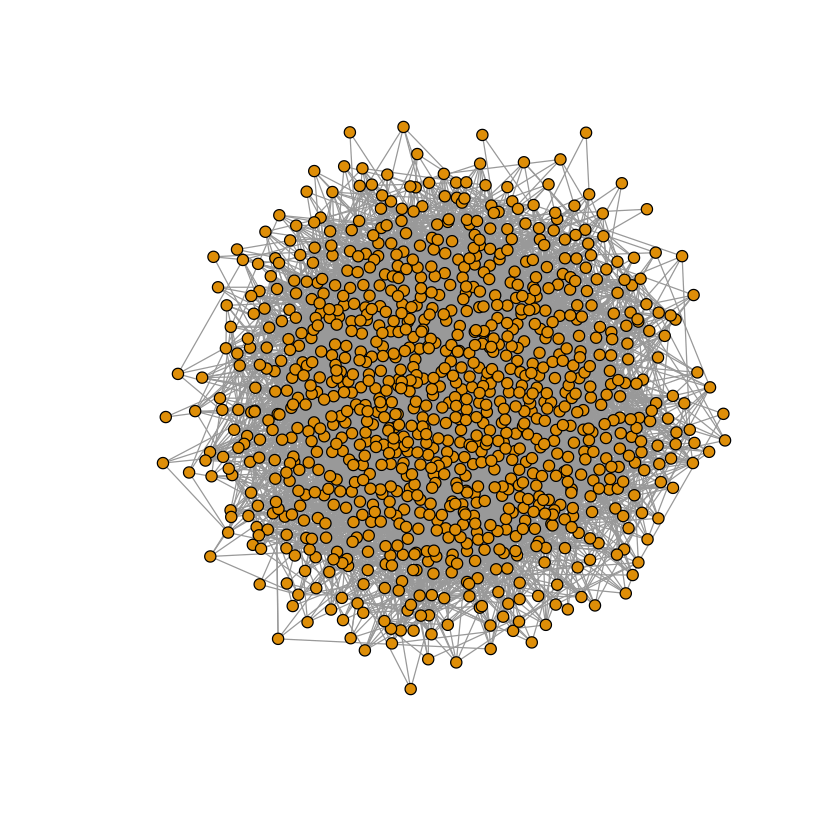

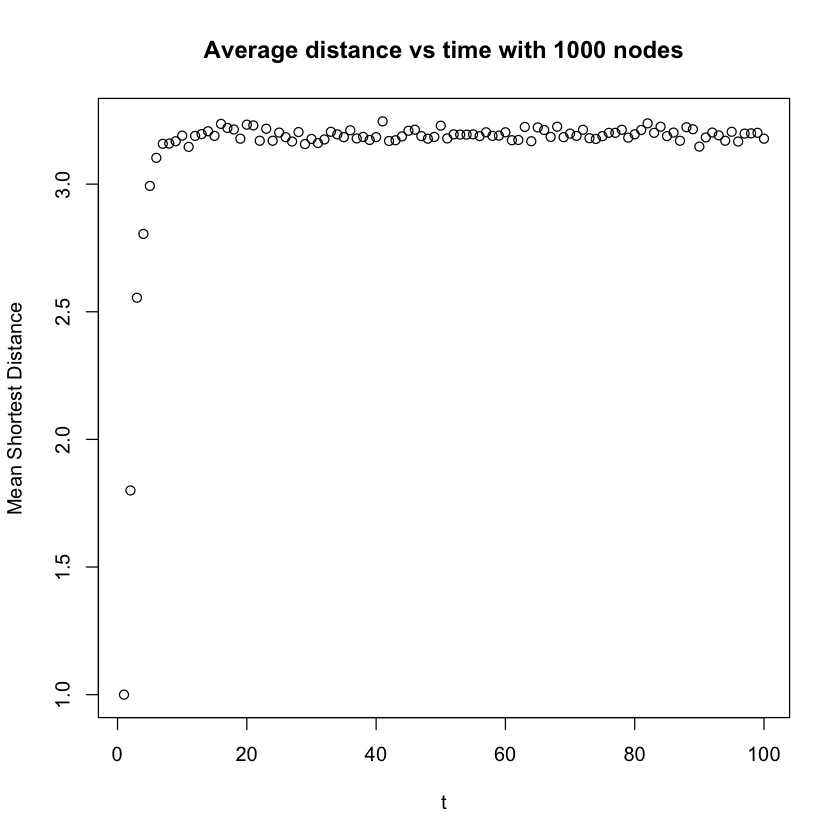

[1] "Problem 2.1c"


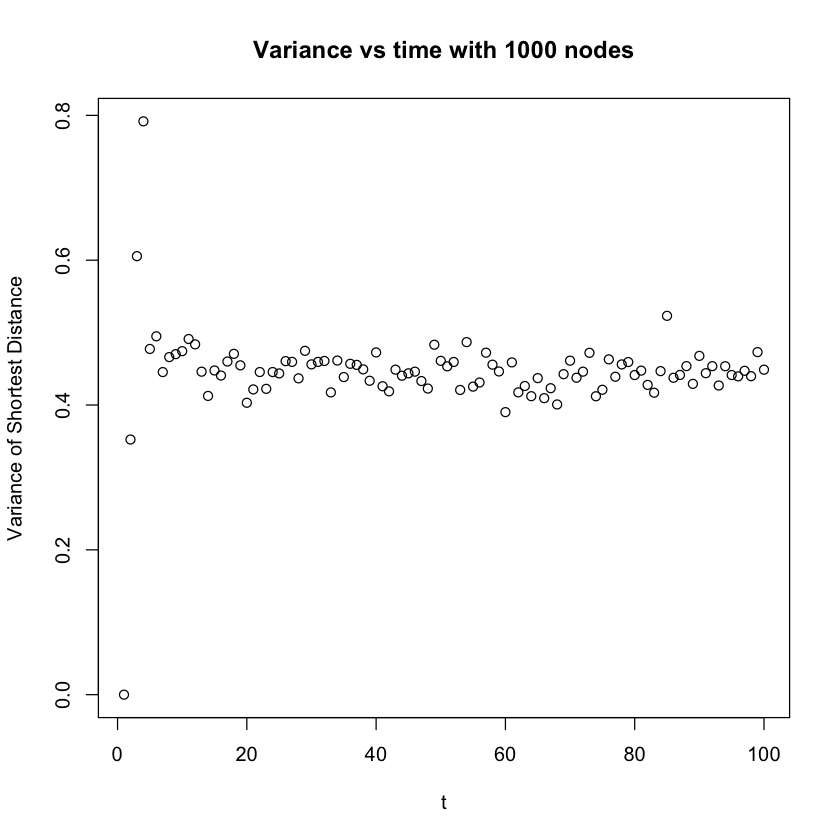

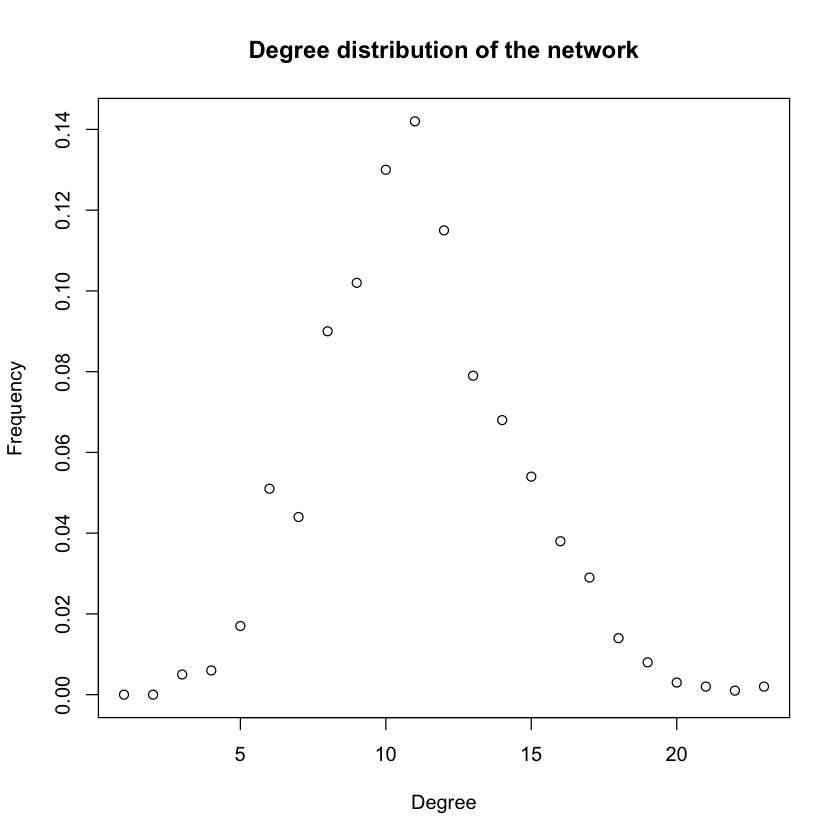

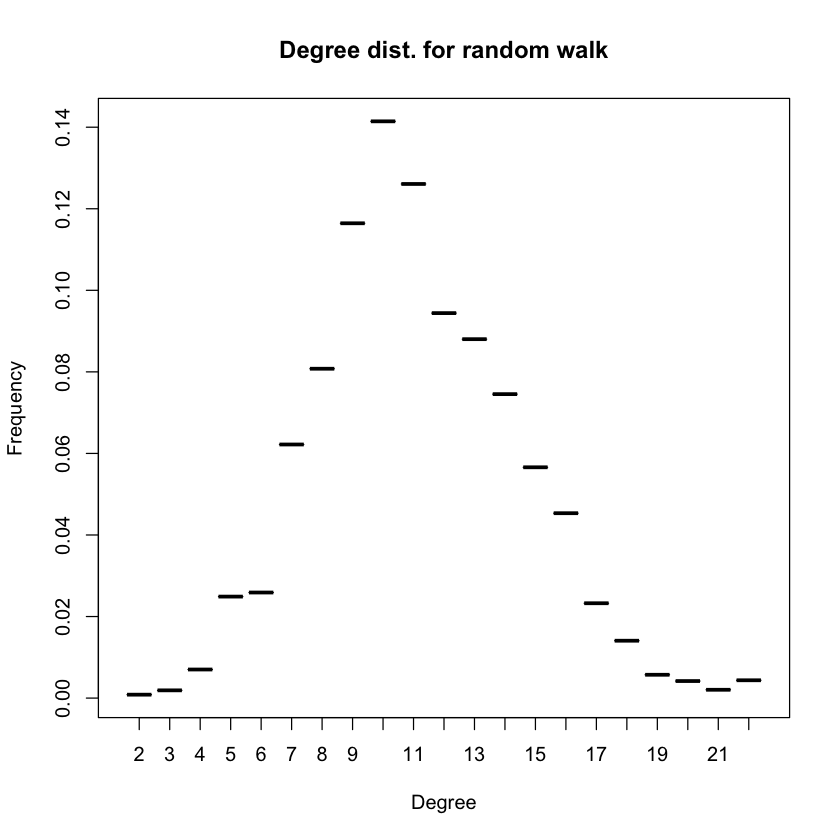

In [200]:
# http://igraph.org/r/doc/erdos.renyi.game.html


set.seed(1)
n = 1000
g1 = erdos.renyi.game(n, 0.01, directed = F)
print('Problem 2.1a')
plot(g1, edge.arrow.size=.1, vertex.size=4, vertex.label=NA)

std_dev_array = c()
variance_array = c()

steps_range = 1:100
sample_times = 1000
graph_degrees = degree(g1)
sample_degrees = c()

transition_matrix = create_transition_matrix(g1)
shorest_paths = shortest.paths(g1)

for (t in steps_range){
    dists = c()
    samples = sample(1:n, sample_times)
    for (s in samples){
        d = random_walk(g1, t, s, transition_matrix)
        sample_degrees = c(sample_degrees, graph_degrees[d])
        dists = c(dists, shorest_paths[s,d])
    }
    std_dev_array = c(std_dev_array, mean(dists))
    variance_array = c(variance_array, var(dists))
}

print('Problem 2.1b')
plot(steps_range, std_dev_array, main =paste("Average distance vs time with", n, "nodes"), xlab = "t", ylab = "Mean Shortest Distance")
plot(steps_range, variance_array, main = paste("Variance vs time with", n, "nodes"), xlab="t", ylab="Variance of Shortest Distance")



print('Problem 2.1c')

matrix_degrees = as.data.frame(table(sample_degrees))
sum_degrees = sum(matrix_degrees$Freq)
matrix_degrees = cbind(matrix_degrees,matrix_degrees$Freq / sum_degrees)
colnames(matrix_degrees) = c('sample_degrees','frequency','distribution')

plot(degree.distribution(g1),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
plot(matrix_degrees$sample_degrees, matrix_degrees$distribution, main="Degree dist. for random walk", xlab="Degree",ylab="Frequency")







[1] "Problem 2.1d"


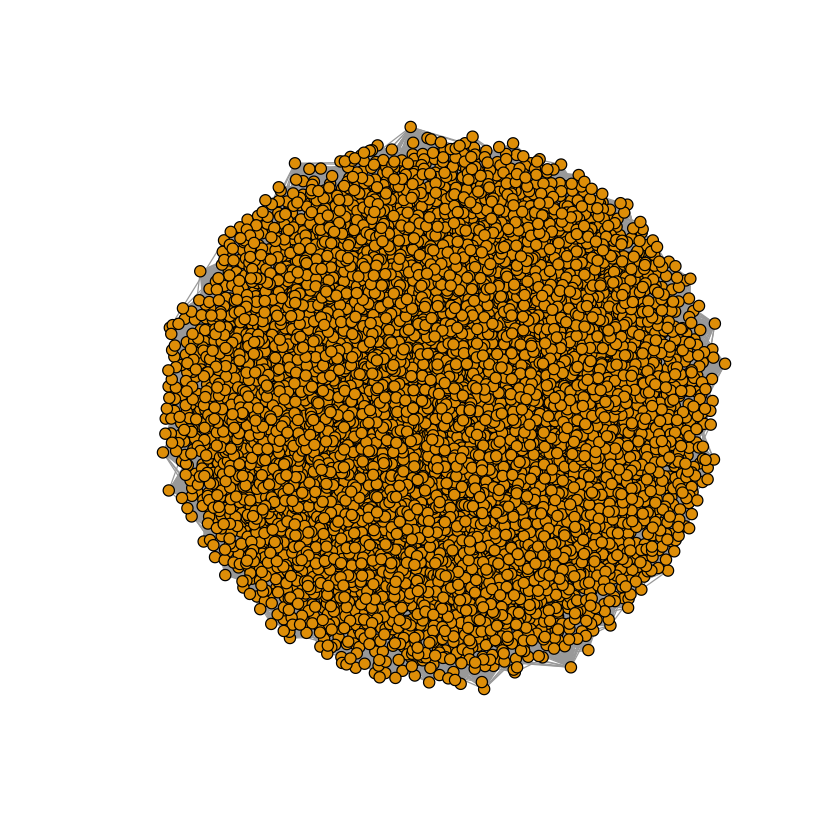

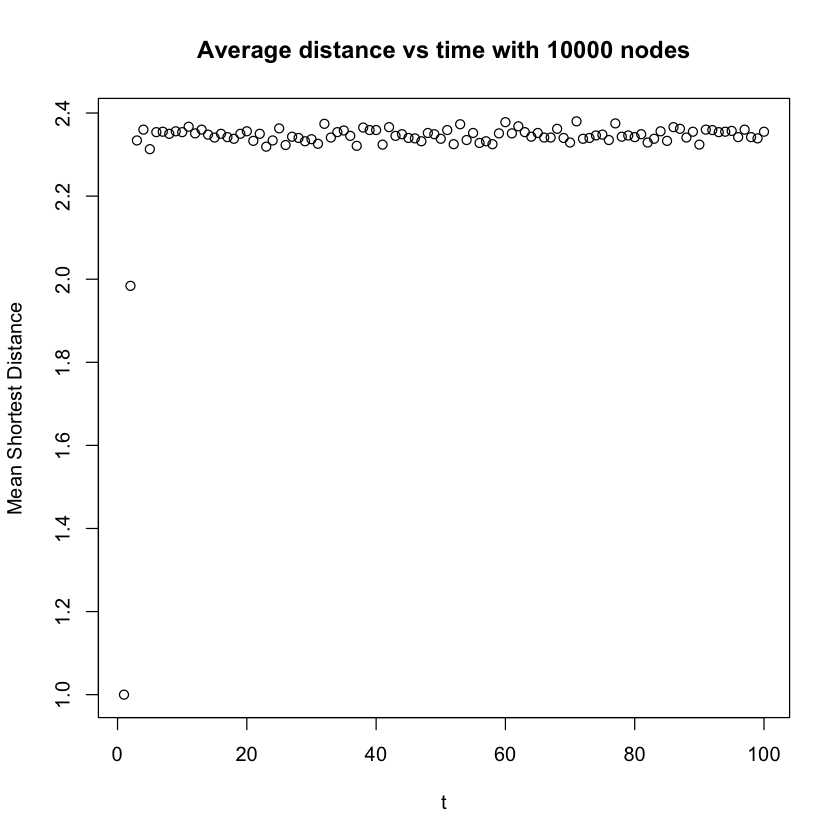

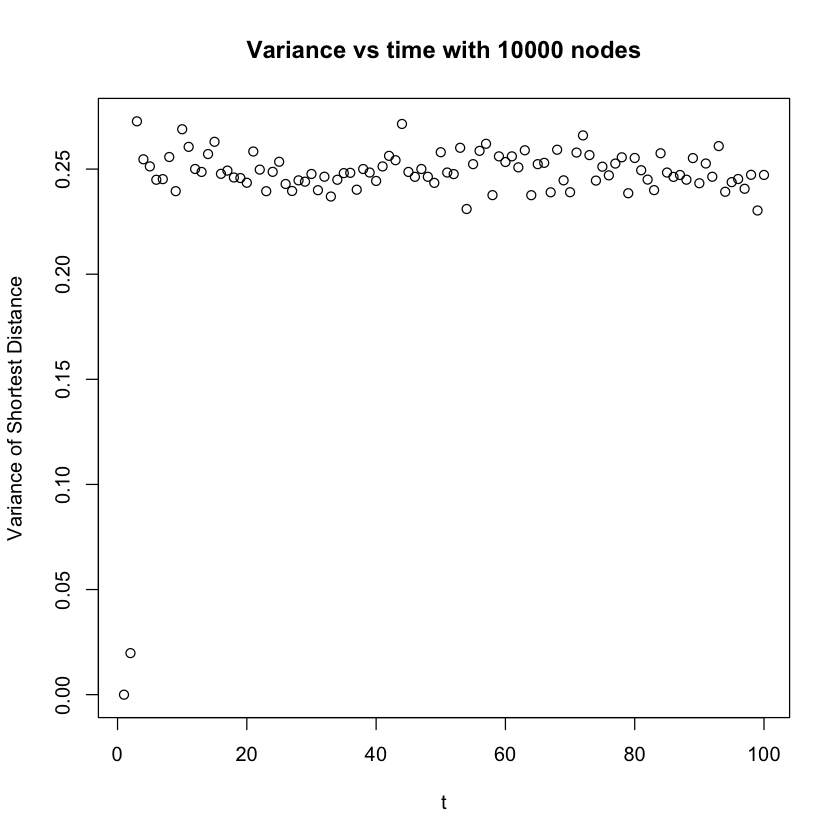

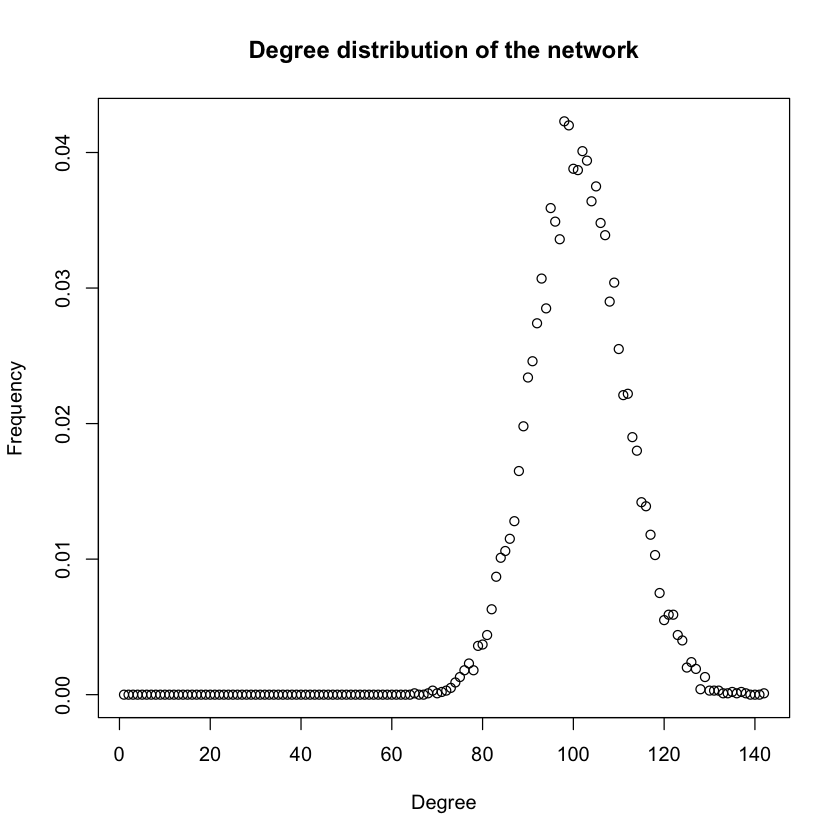

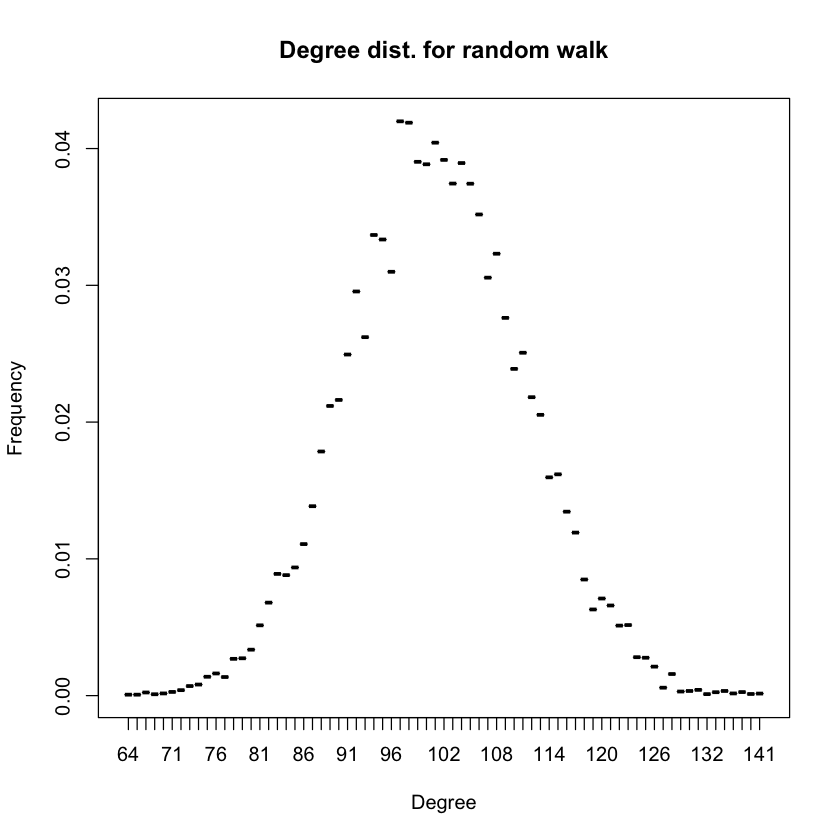

In [201]:
# http://igraph.org/r/doc/erdos.renyi.game.html

print('Problem 2.1d')

set.seed(1)
n = 10000
g1 = erdos.renyi.game(n, 0.01, directed = F)
plot(g1, edge.arrow.size=.1, vertex.size=4, vertex.label=NA)

std_dev_array = c()
variance_array = c()

steps_range = 1:100
sample_times = 1000
graph_degrees = degree(g1)
sample_degrees = c()

transition_matrix = create_transition_matrix(g1)
shorest_paths = shortest.paths(g1)

for (t in steps_range){
    dists = c()
    samples = sample(1:n, sample_times)
    for (s in samples){
        d = random_walk(g1, t, s, transition_matrix)
        sample_degrees = c(sample_degrees, graph_degrees[d])
        dists = c(dists, shorest_paths[s,d])
    }
    std_dev_array = c(std_dev_array, mean(dists))
    variance_array = c(variance_array, var(dists))
}

plot(steps_range, std_dev_array, main =paste("Average distance vs time with", n, "nodes"), xlab = "t", ylab = "Mean Shortest Distance")
plot(steps_range, variance_array, main = paste("Variance vs time with", n, "nodes"), xlab="t", ylab="Variance of Shortest Distance")


matrix_degrees = as.data.frame(table(sample_degrees))
sum_degrees = sum(matrix_degrees$Freq)
matrix_degrees = cbind(matrix_degrees,matrix_degrees$Freq / sum_degrees)
colnames(matrix_degrees) = c('sample_degrees','frequency','distribution')

plot(degree.distribution(g1),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
plot(matrix_degrees$sample_degrees, matrix_degrees$distribution, main="Degree dist. for random walk", xlab="Degree",ylab="Frequency")








[1] "Problem 2.2a"
[1] "Problem 2.2b"


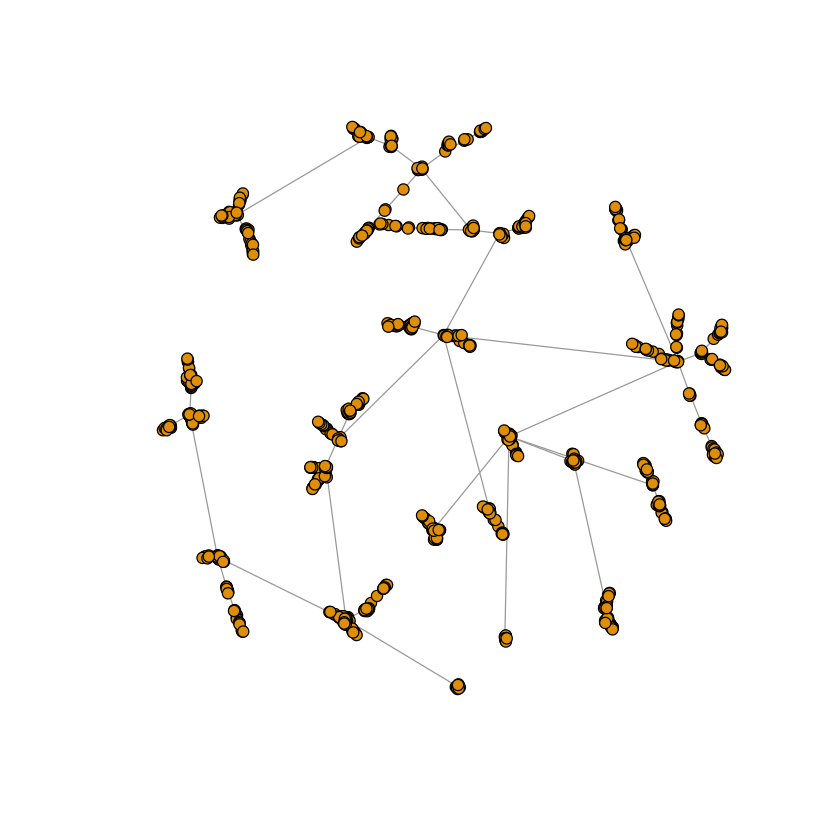

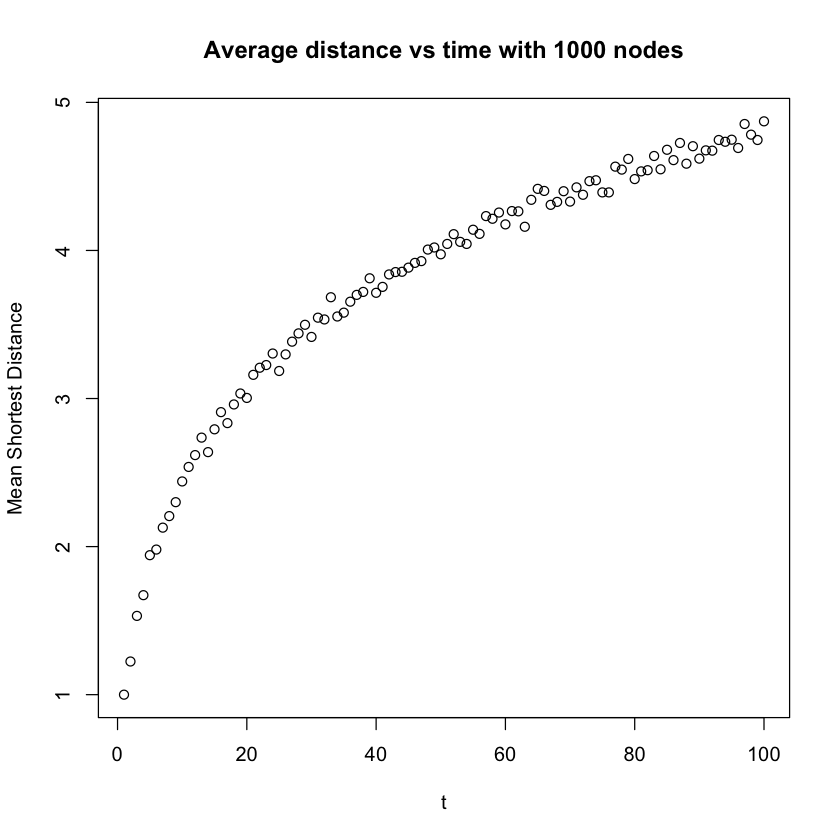

[1] "Problem 2.2c"


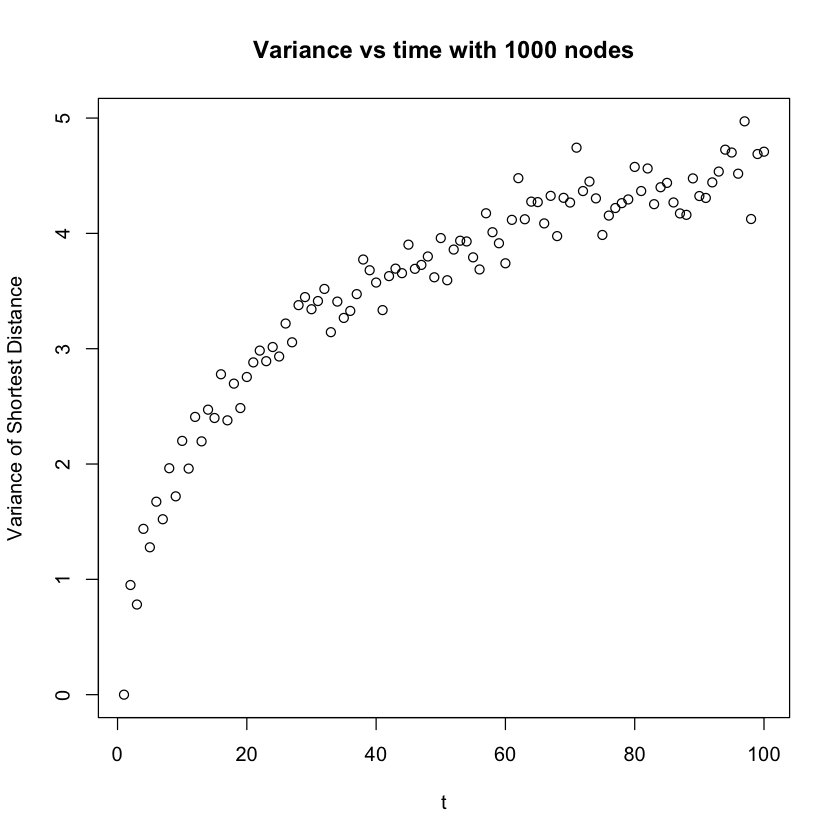

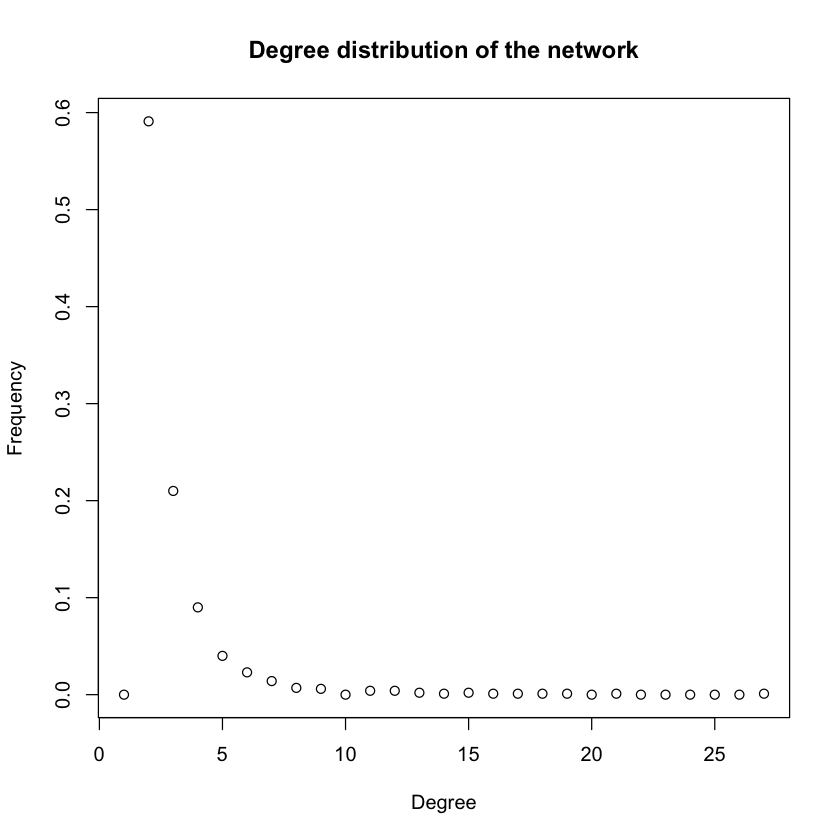

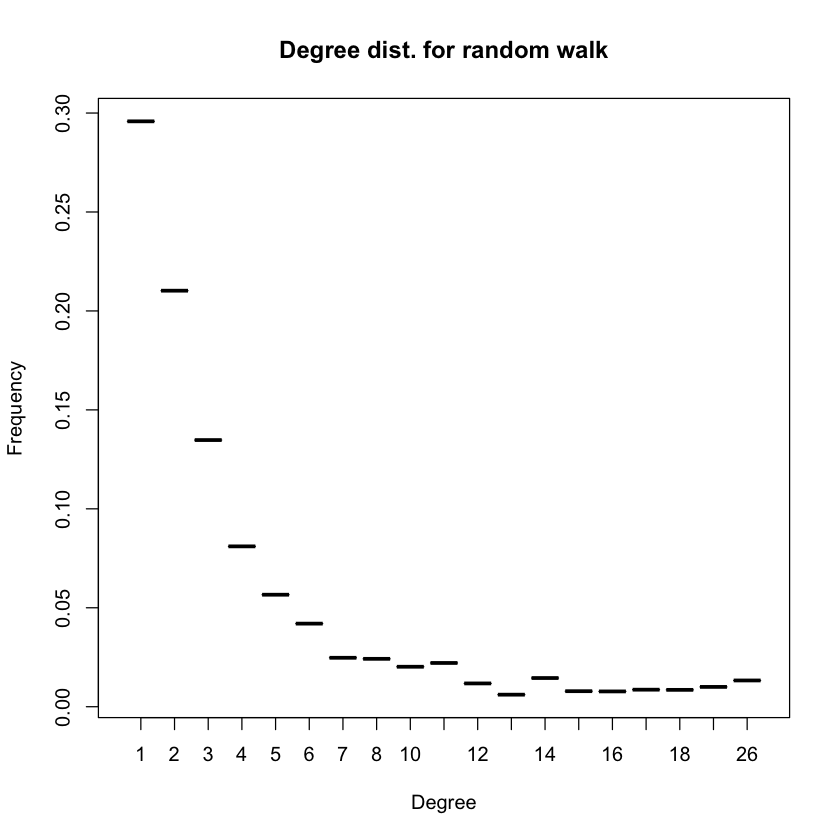

In [202]:
# http://igraph.org/r/doc/erdos.renyi.game.html


set.seed(1)
n = 1000
g2 = barabasi.game(n, m=1, directed=F)
print('Problem 2.2a')
plot(g2, edge.arrow.size=.1, vertex.size=4, vertex.label=NA)

std_dev_array = c()
variance_array = c()

steps_range = 1:100
sample_times = 1000
graph_degrees = degree(g2)
sample_degrees = c()

transition_matrix = create_transition_matrix(g2)
shorest_paths = shortest.paths(g2)

for (t in steps_range){
    dists = c()
    samples = sample(1:n, sample_times)
    for (s in samples){
        d = random_walk(g2, t, s, transition_matrix)
        sample_degrees = c(sample_degrees, graph_degrees[d])
        dists = c(dists, shorest_paths[s,d])
    }
    std_dev_array = c(std_dev_array, mean(dists))
    variance_array = c(variance_array, var(dists))
}

print('Problem 2.2b')
plot(steps_range, std_dev_array, main =paste("Average distance vs time with", n, "nodes"), xlab = "t", ylab = "Mean Shortest Distance")
plot(steps_range, variance_array, main = paste("Variance vs time with", n, "nodes"), xlab="t", ylab="Variance of Shortest Distance")



print('Problem 2.2c')

matrix_degrees = as.data.frame(table(sample_degrees))
sum_degrees = sum(matrix_degrees$Freq)
matrix_degrees = cbind(matrix_degrees,matrix_degrees$Freq / sum_degrees)
colnames(matrix_degrees) = c('sample_degrees','frequency','distribution')

plot(degree.distribution(g2),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
plot(matrix_degrees$sample_degrees, matrix_degrees$distribution, main="Degree dist. for random walk", xlab="Degree",ylab="Frequency")








[1] "Problem 2.2d"


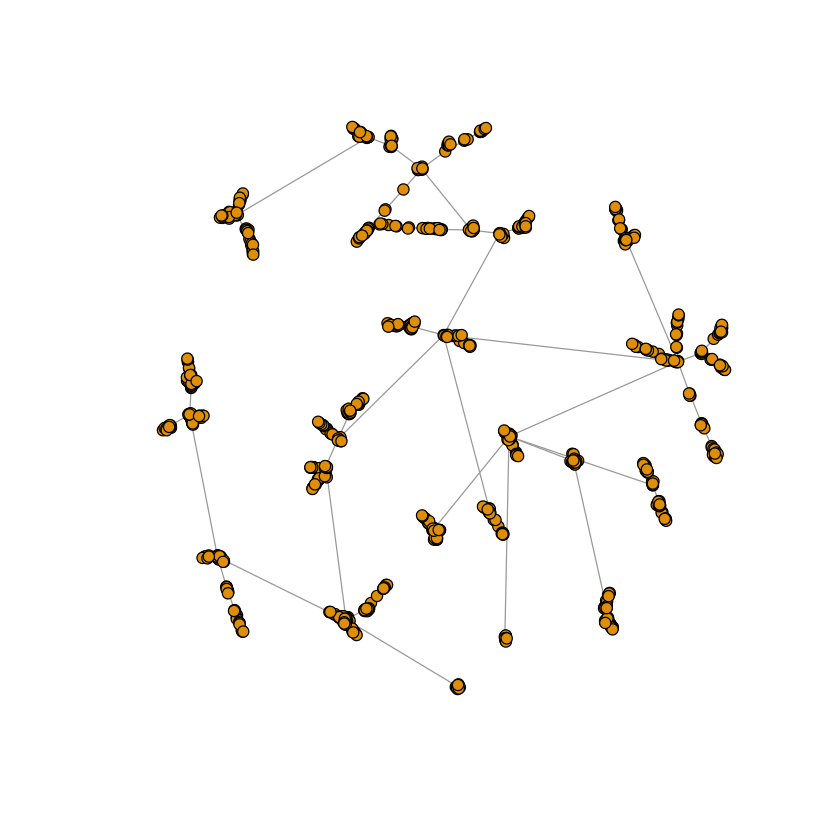

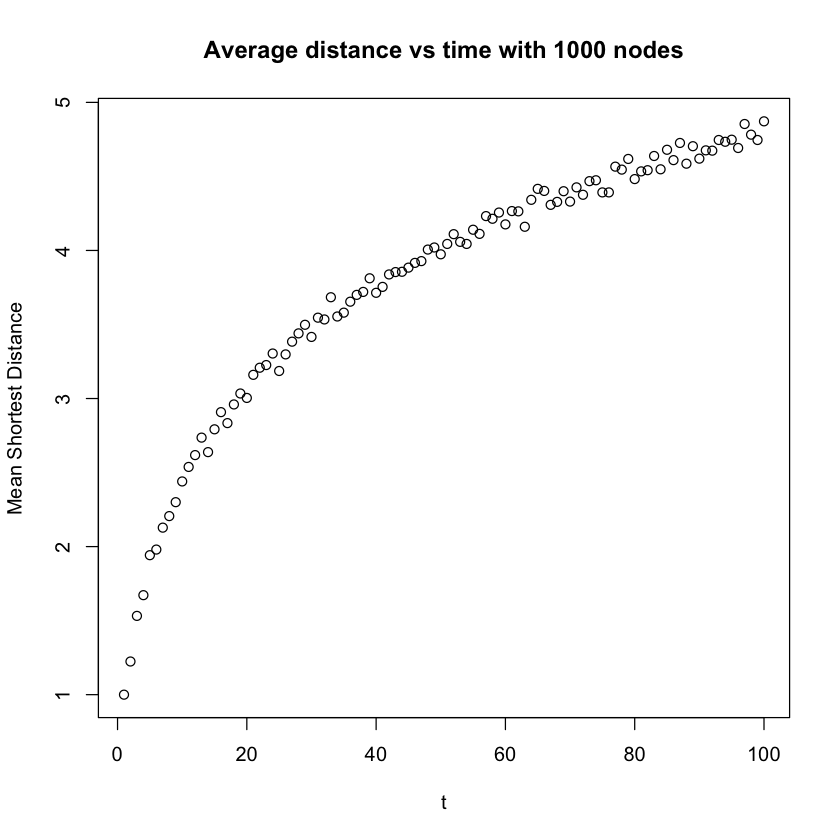

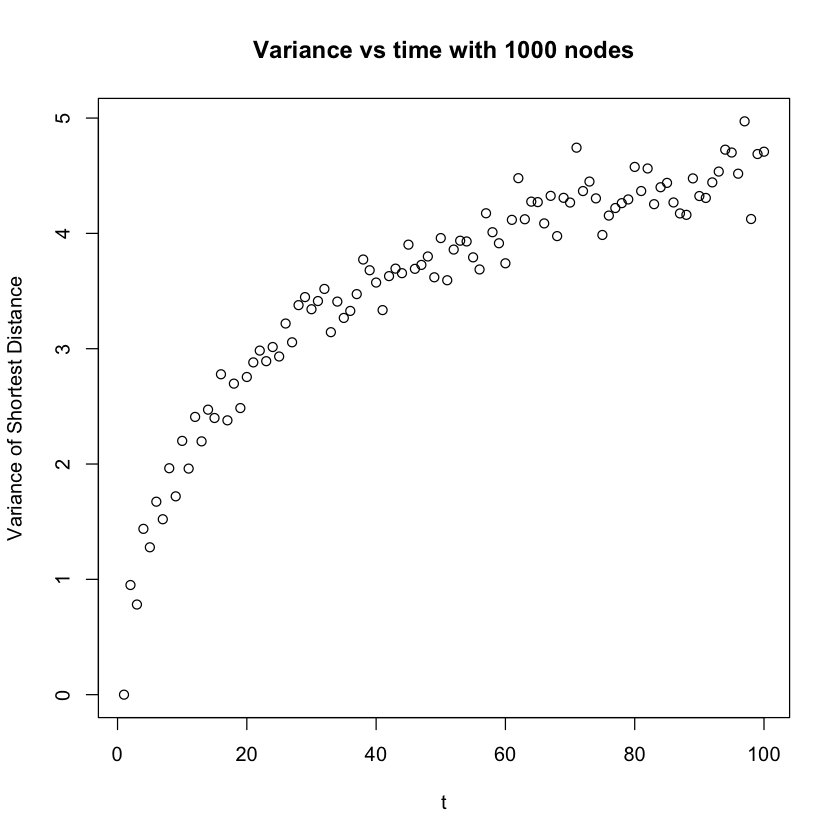

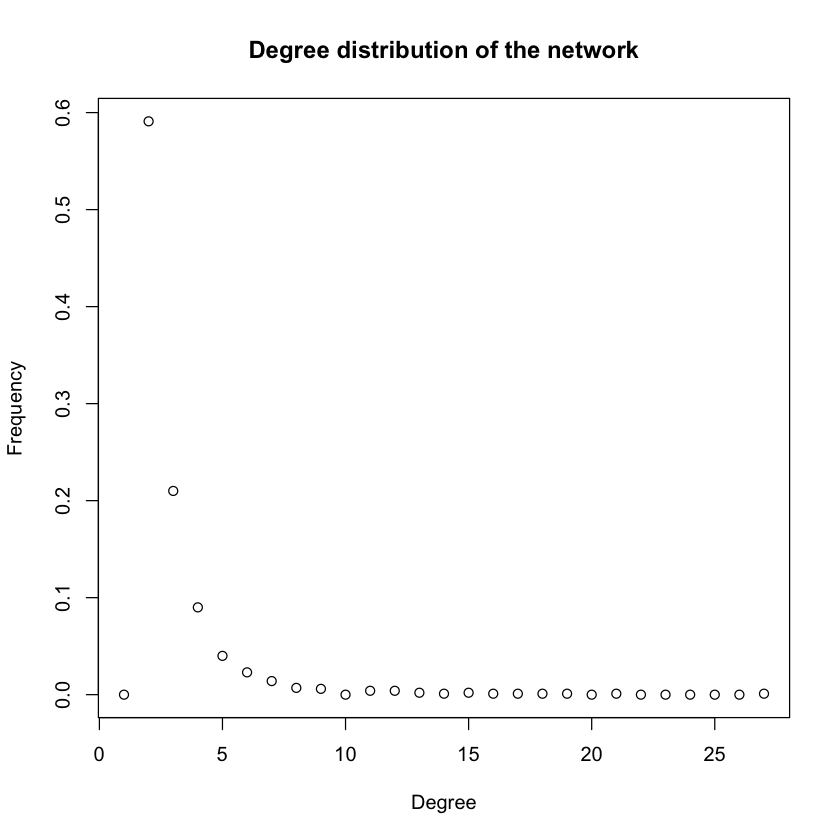

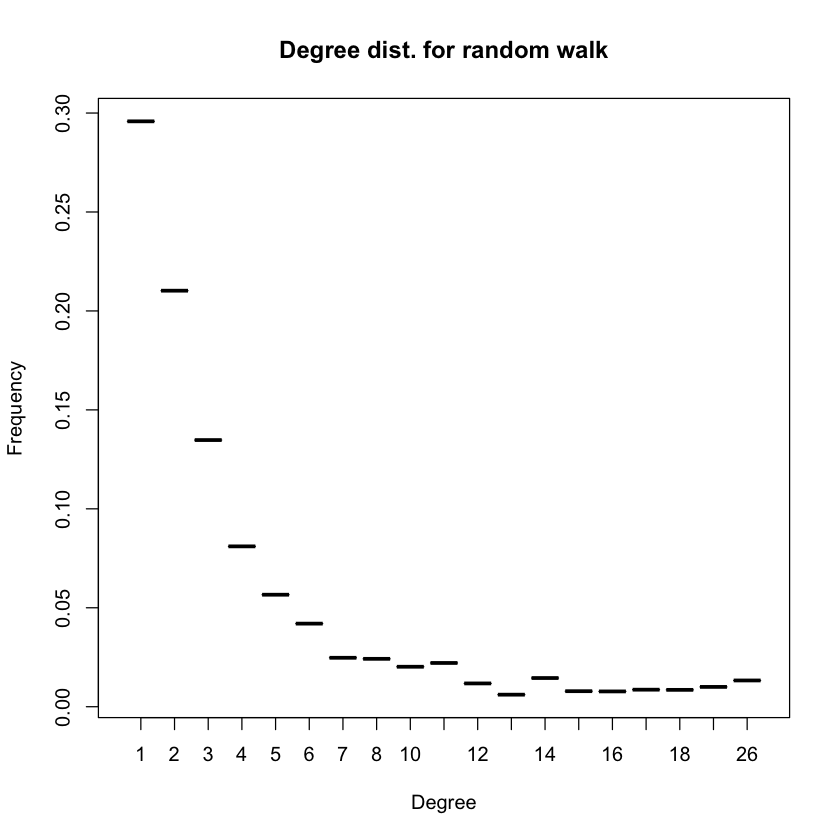

In [203]:
# http://igraph.org/r/doc/erdos.renyi.game.html


set.seed(1)
n = 1000
g2 = barabasi.game(n, m=1, directed=F)
print('Problem 2.2d')
plot(g2, edge.arrow.size=.1, vertex.size=4, vertex.label=NA)

std_dev_array = c()
variance_array = c()

steps_range = 1:100
sample_times = 1000
graph_degrees = degree(g2)
sample_degrees = c()

transition_matrix = create_transition_matrix(g2)
shorest_paths = shortest.paths(g2)

for (t in steps_range){
    dists = c()
    samples = sample(1:n, sample_times)
    for (s in samples){
        d = random_walk(g2, t, s, transition_matrix)
        sample_degrees = c(sample_degrees, graph_degrees[d])
        dists = c(dists, shorest_paths[s,d])
    }
    std_dev_array = c(std_dev_array, mean(dists))
    variance_array = c(variance_array, var(dists))
}

plot(steps_range, std_dev_array, main =paste("Average distance vs time with", n, "nodes"), xlab = "t", ylab = "Mean Shortest Distance")
plot(steps_range, variance_array, main = paste("Variance vs time with", n, "nodes"), xlab="t", ylab="Variance of Shortest Distance")



matrix_degrees = as.data.frame(table(sample_degrees))
sum_degrees = sum(matrix_degrees$Freq)
matrix_degrees = cbind(matrix_degrees,matrix_degrees$Freq / sum_degrees)
colnames(matrix_degrees) = c('sample_degrees','frequency','distribution')

plot(degree.distribution(g2),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
plot(matrix_degrees$sample_degrees, matrix_degrees$distribution, main="Degree dist. for random walk", xlab="Degree",ylab="Frequency")







